Feature definitions:
- FAVC: Do you eat high caloric food frequently? (Binary)
- FCVC: Do you usually eat vegetables in your meals? (Integer)
- NCP: How many main meals do you have daily? (Continuous)
- CAEC: Do you eat any food between meals? (Categorical)
- SMOKE: Do you smoke? (Binary)
- CH2O: How much water do you drink daily? (Continuous)
- SCC: Do you monitor the calories you eat daily? (Binary)
- FAF: How often do you have physical activity? (Continout)
- TUE: How much time do you use technological devices such as cell phone, videogames, television, computer and others? (Integer)
- CALC: How often do you drink alcohol? (Categorical)
- MTRANS: Which transportation do you usually use? (Categorical)
- NObeyesdad: Obesity level (Target feature, categorical)

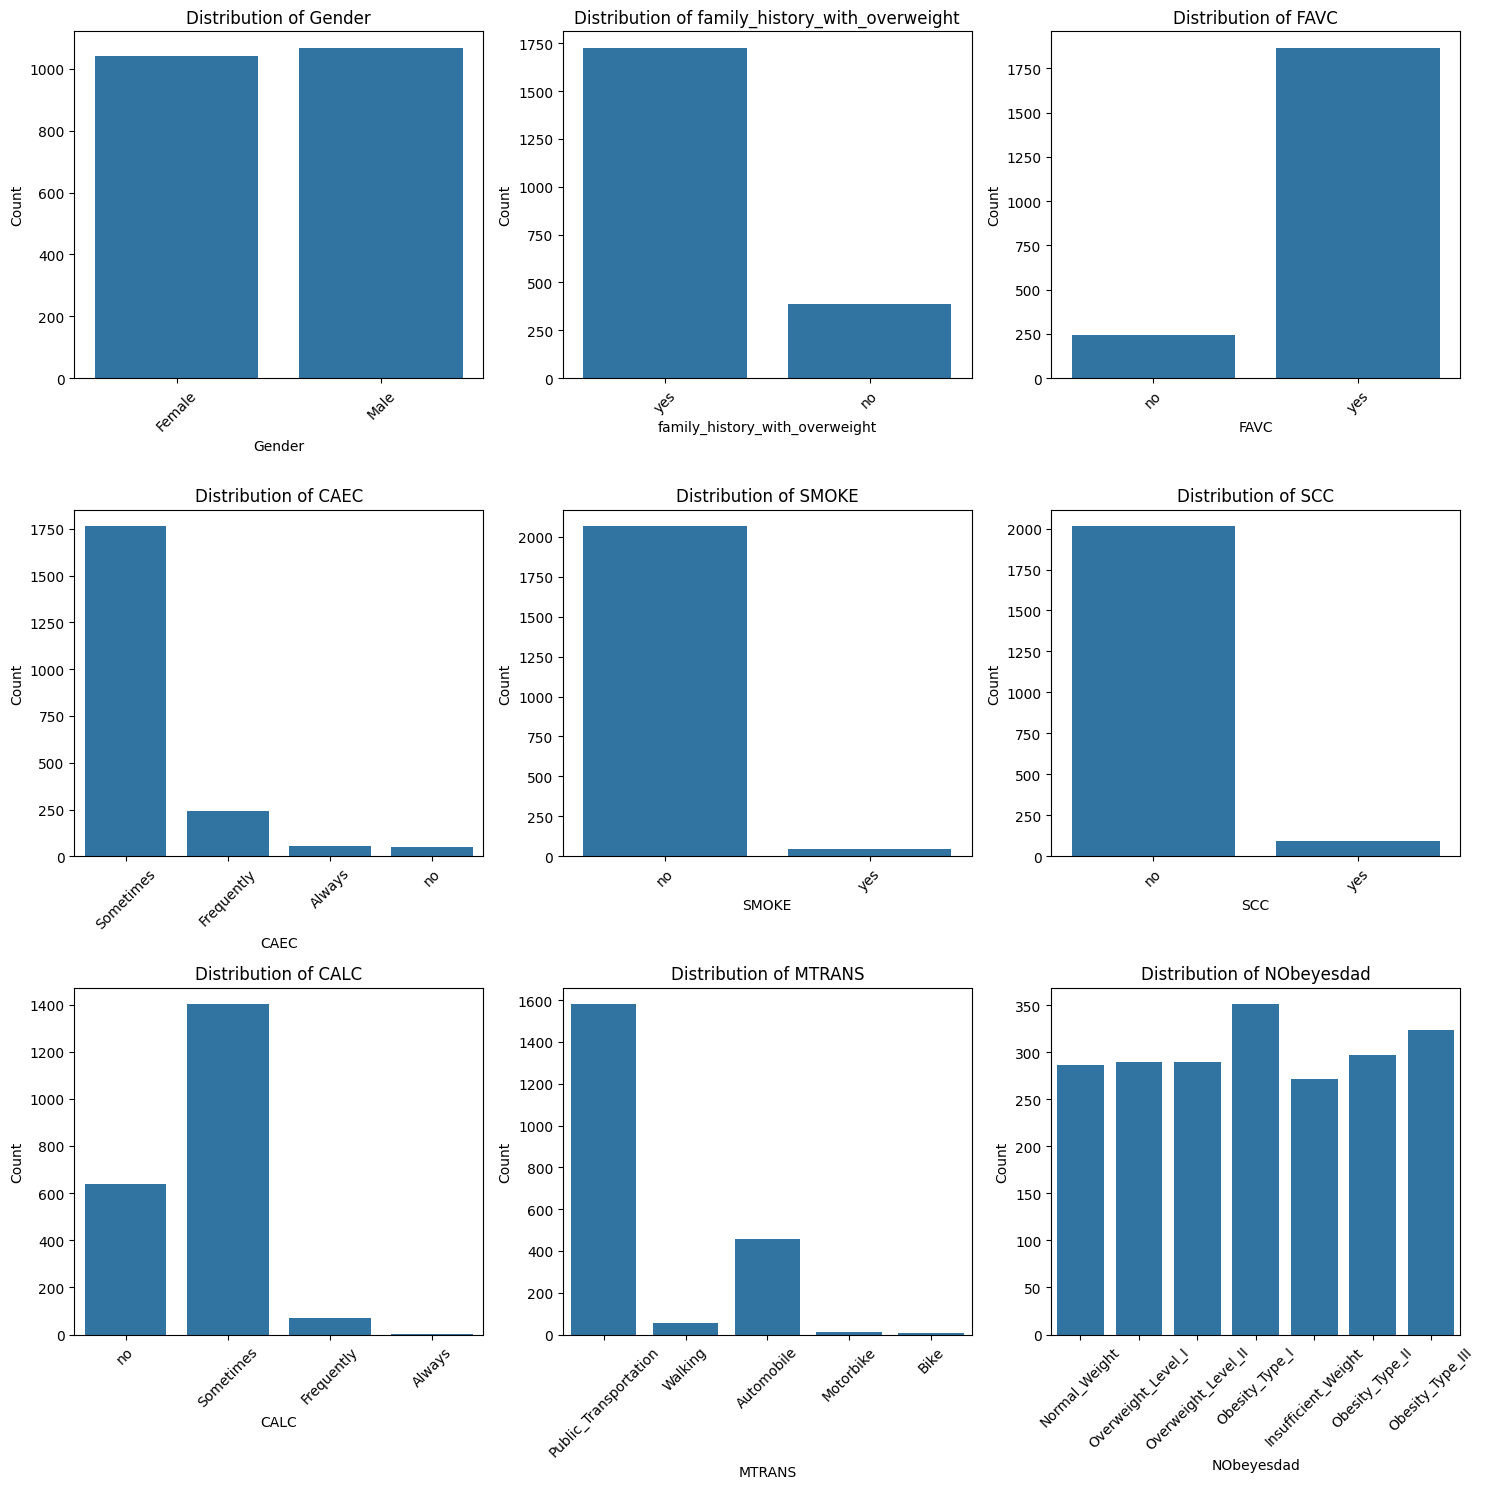

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

from io_operations import read_from_csv

df = read_from_csv('data/dataset.csv')

categorical_features = df.select_dtypes(exclude=["number"]).columns  
num_features = len(categorical_features)

cols = 3 
rows = -(-num_features // cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


There are many observations to be drawn from analyzing the distribution of categorical features across the dataset.
- The dataset is balanced in terms of gender
- The vast majority of subjects don't smoke
- The vast majority doesn't monitor calories
- The vast majority consumes high calorie foods frequently
- The vast majority has a history of obesity in their family
- Public transport is the dominant mode of transport in the dataset
- The vast majority of subjects sometimes eats between meals
- The vast majority sometimes consumes alcohol.

The target feature is relatively balanced.

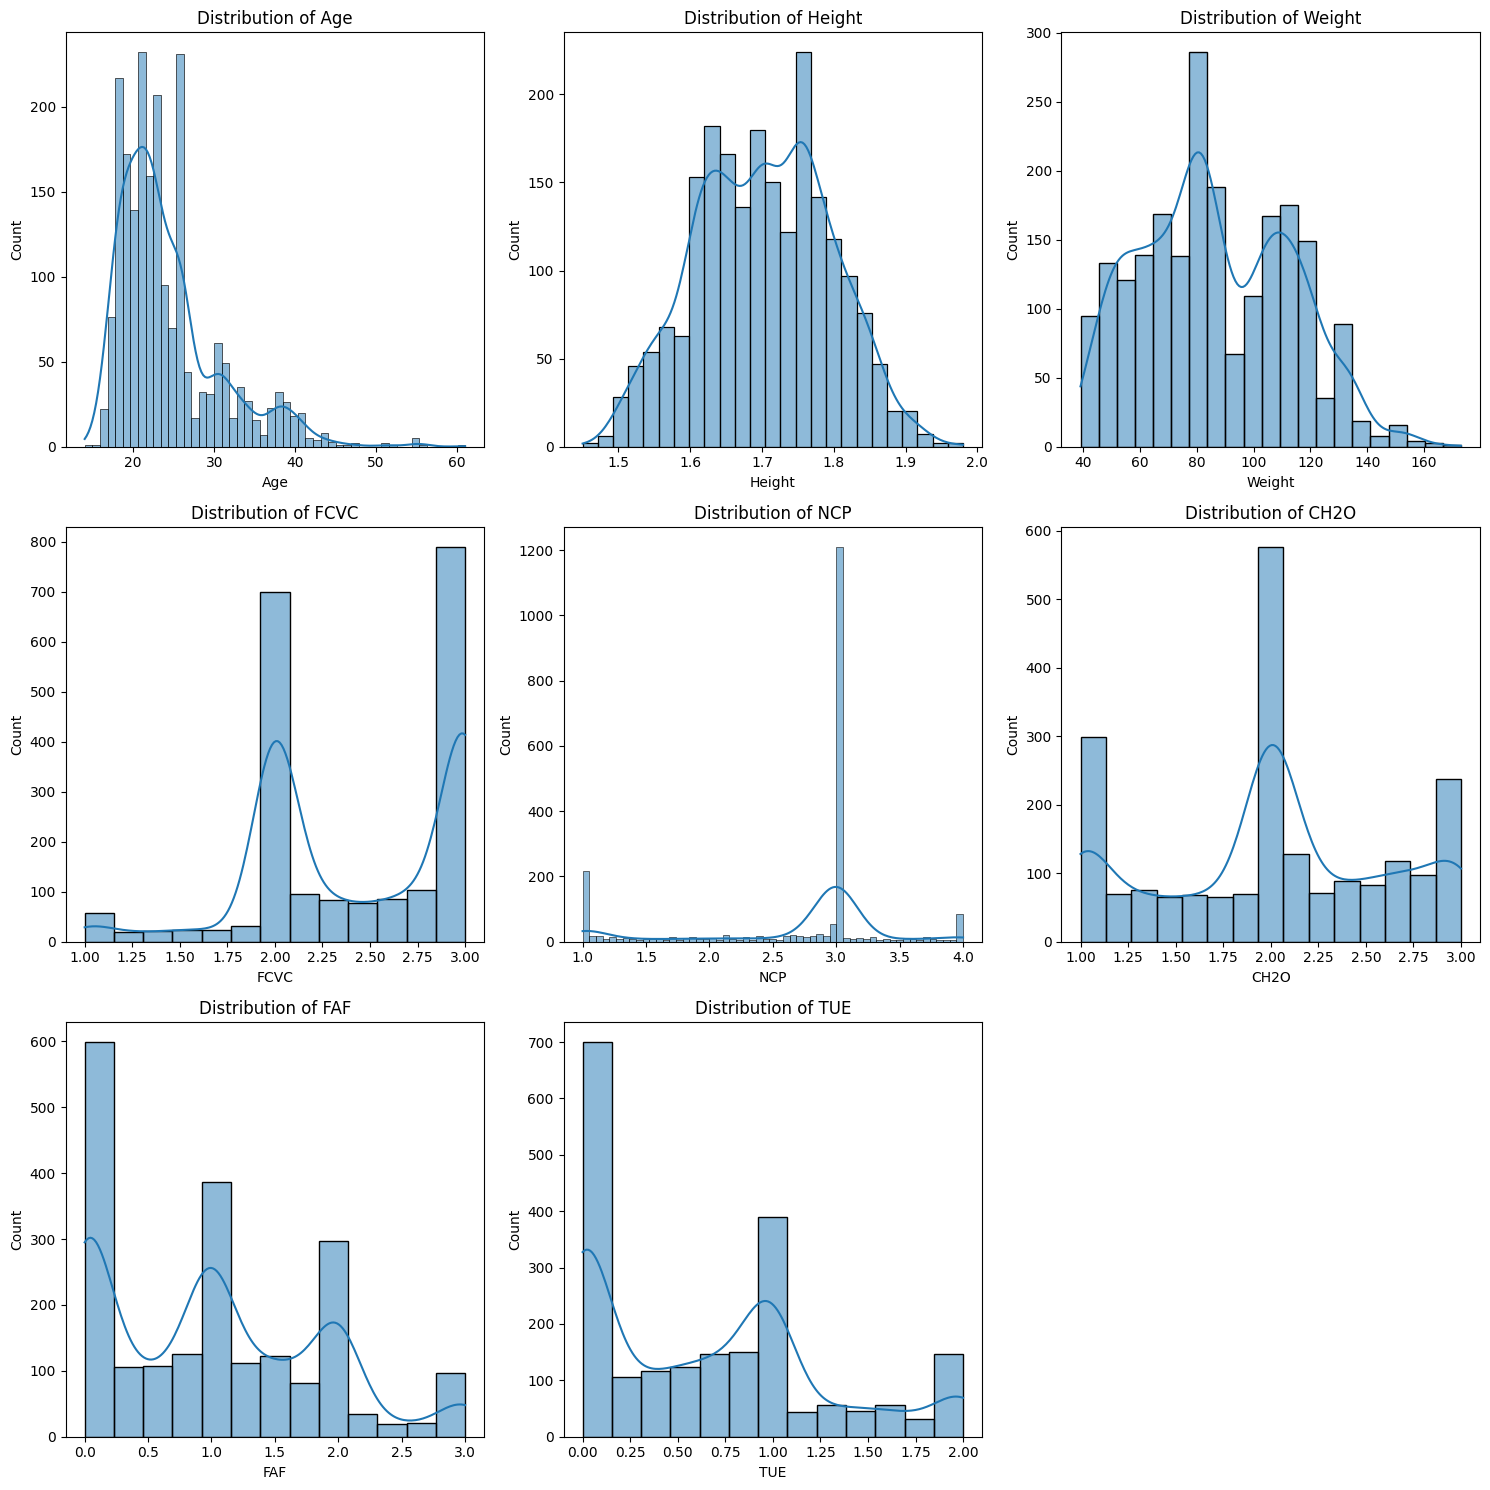

In [10]:
df = read_from_csv('data/dataset.csv')

numerical_features = df.select_dtypes(include=["number"]).columns
num_features = len(numerical_features)

cols = 3
rows = -(-num_features // cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

The histograms of each numerical feature lead to a few observations:
- The dataset includes primarily young people (~20 years old)
- The distribution of height resembles a bell curve
- The vast majority of people eat 3 meals per day
- The surveyed subjects are very likely to pick integers even on a continous scale.

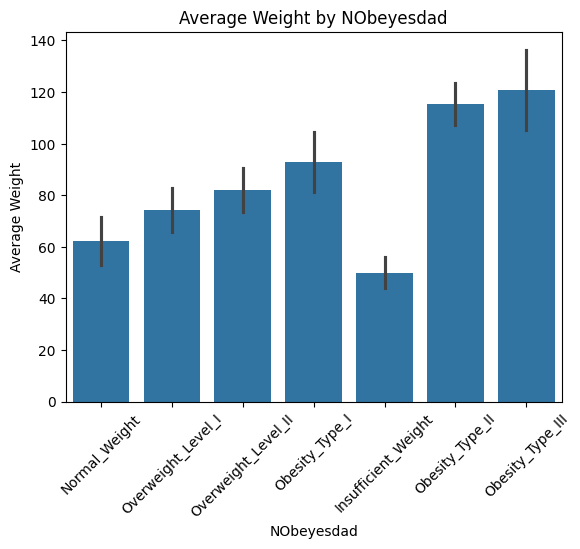

In [74]:
df = read_from_csv('data/dataset.csv')

sns.barplot(
    x=df["NObeyesdad"],
    y=df["Weight"],
    errorbar="sd",
)

plt.title("Average Weight by NObeyesdad")
plt.xlabel("NObeyesdad")
plt.ylabel("Average Weight")
plt.xticks(rotation=45)
plt.show()

Overlapping error bars for different categories suggest weight alone doesn't provide a full distinction between weight categories.

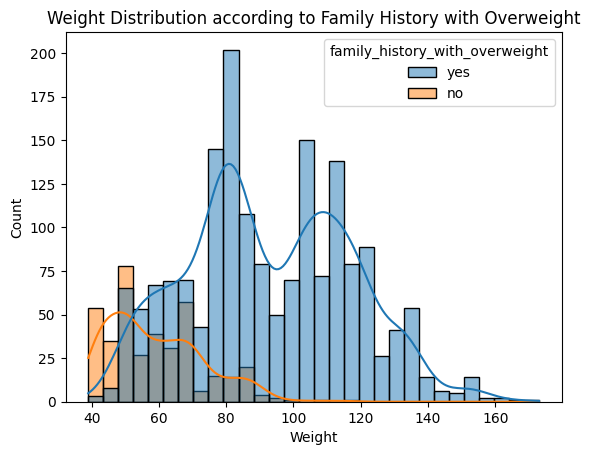

In [75]:
df = read_from_csv("data/dataset.csv")

sns.histplot(df, x="Weight", hue="family_history_with_overweight", kde=True, bins=30)
plt.title("Weight Distribution according to Family History with Overweight")
plt.show()


This distribution indicates people with a history of obesity in their family make up the majority of the upper end of the weight spectrum, meanwhile no history of obesity in the family is concentrated at the lower end.

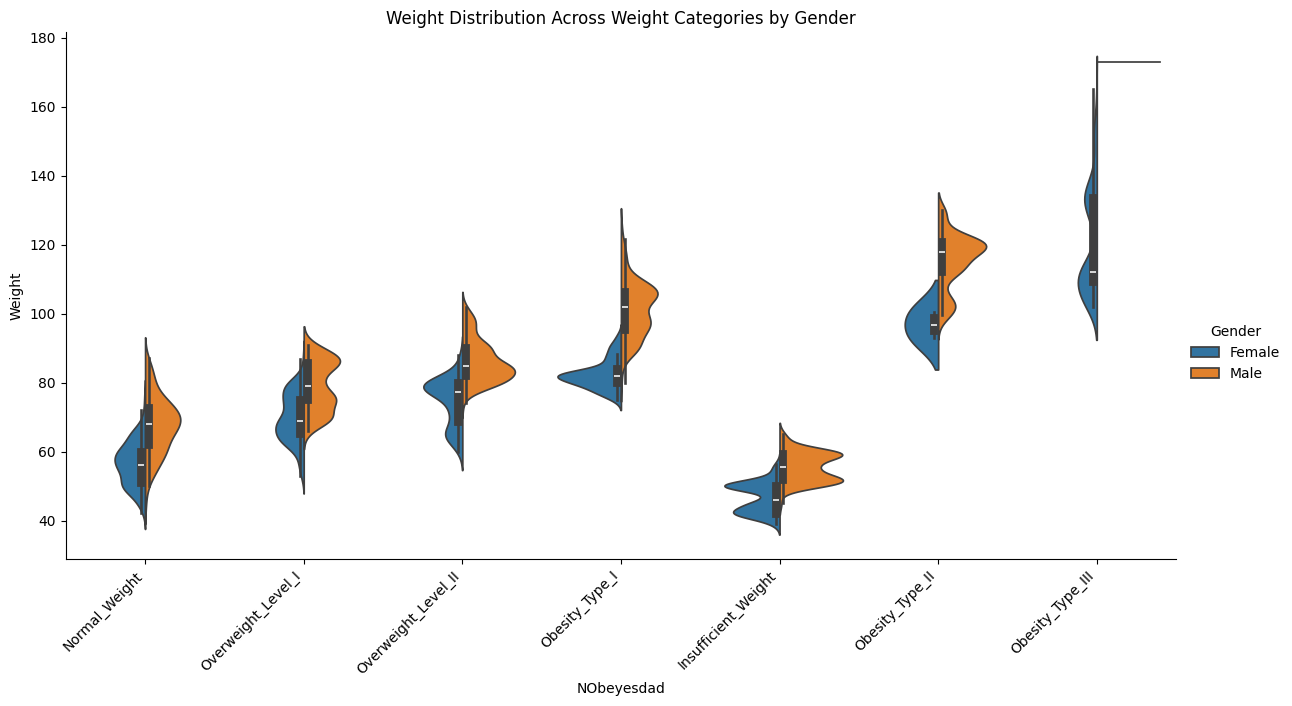

In [76]:
df = read_from_csv("data/dataset.csv")

sns.catplot(
    data=df, x="NObeyesdad", y="Weight", hue="Gender",
    kind="violin", split=True,
    height=6,
    aspect=2
)
plt.xticks(rotation=45, ha="right")
plt.title("Weight Distribution Across Weight Categories by Gender")
plt.show()

We see the weight composition of each obesity class differs by gender. The trend is that males occupy the upper weight range of a given obesity class which indicates a potential correlation between gender and weight class.

/tmp/ipykernel_44107/894569178.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cramers_matrix.loc[i][j] = 1
/tmp/ipykernel_44107/894569178.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

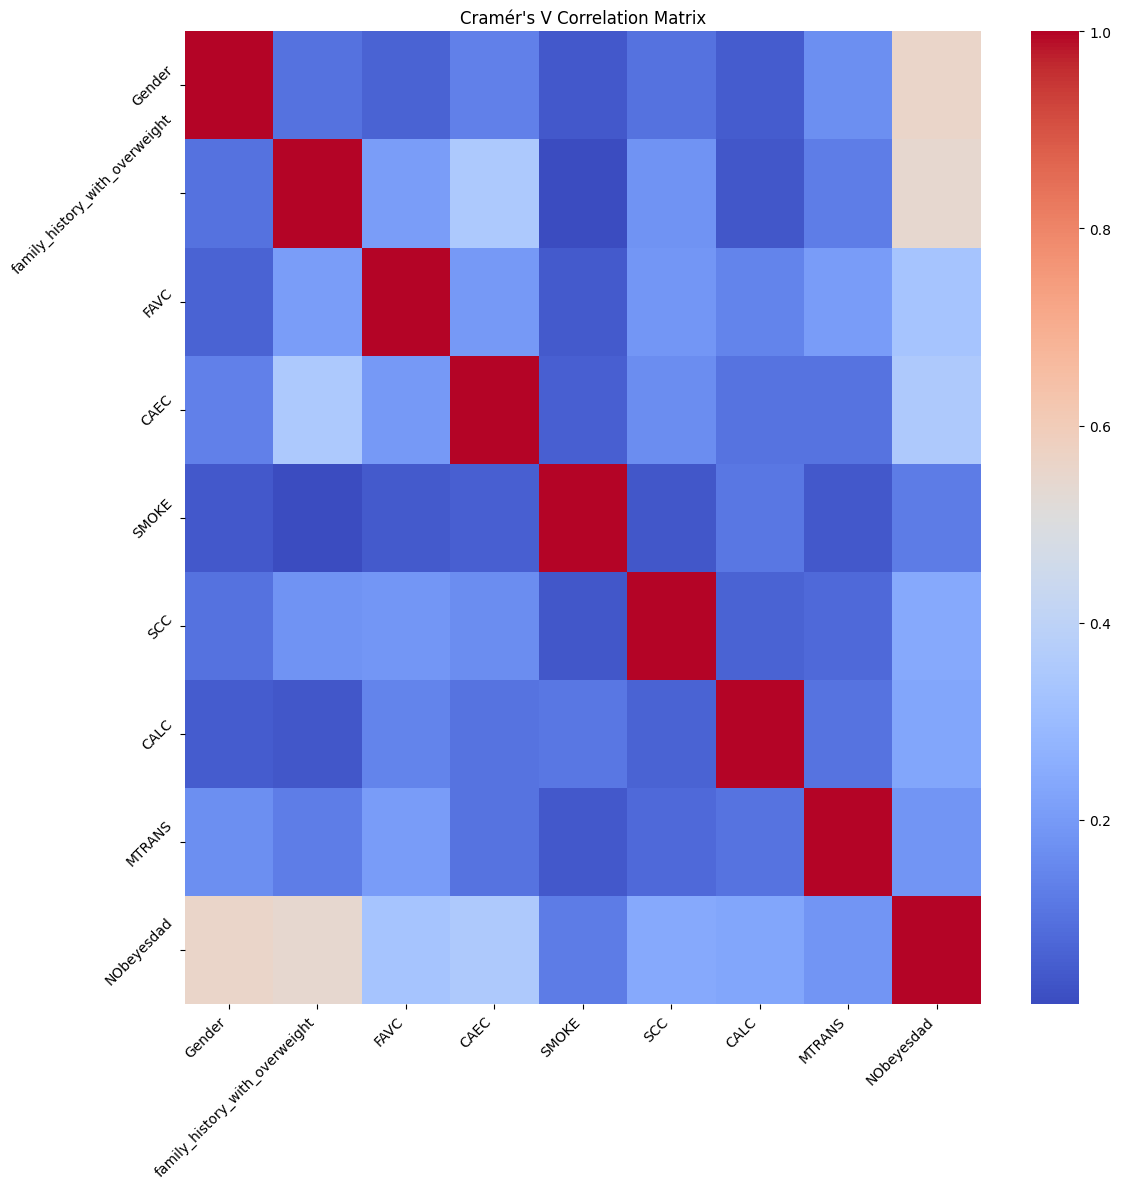

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from io_operations import read_from_csv

df = read_from_csv("data/dataset.csv")

def cramers_v(contingency_table):
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

categorical_features = df.select_dtypes(include=['object']).columns
cramers_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)
for i in categorical_features:
    for j in categorical_features:
        if i == j:
            cramers_matrix.loc[i,j] = 1
        else:
            table = pd.crosstab(df[i], df[j])
            cramers_matrix.loc[i,j] = cramers_v(table)

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(12, 12))
sns.heatmap(cramers_matrix, cmap="coolwarm")
plt.title("Cramér's V Correlation Matrix")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We notice obesity class has a relatively strong correlation with both gender and family obesity history

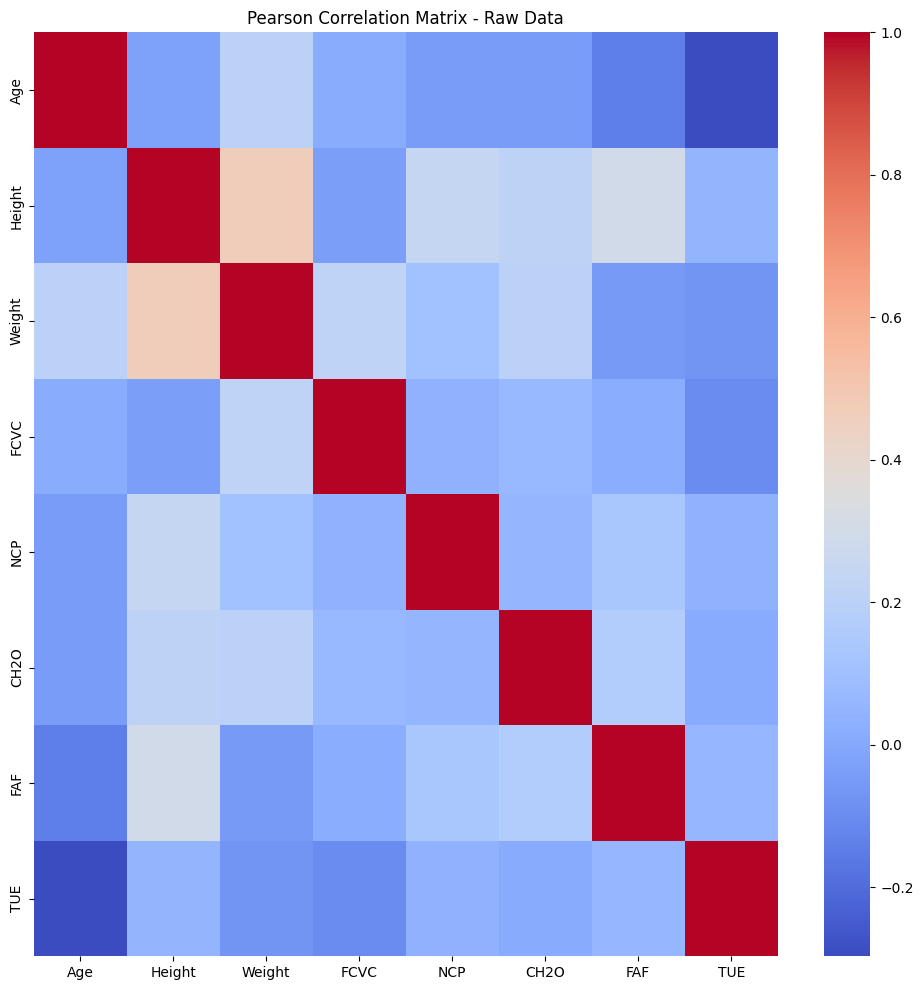

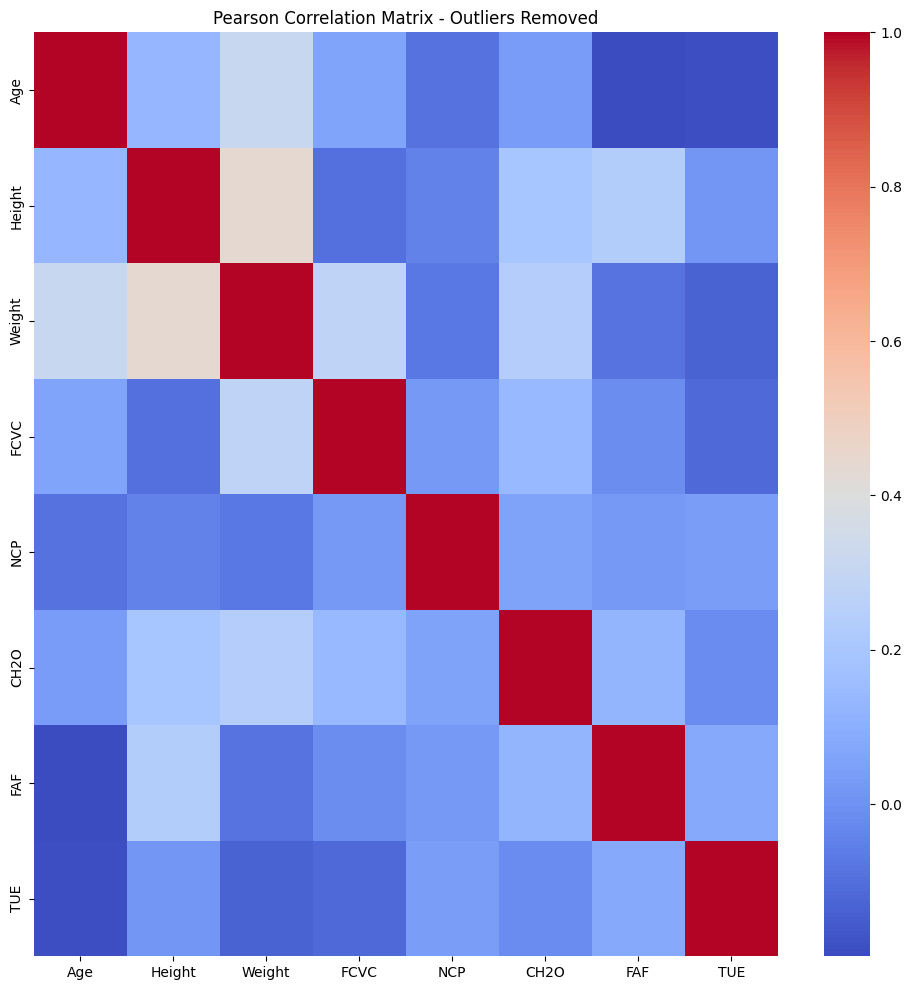

In [78]:
df = read_from_csv("data/dataset.csv")

numeric_features = df.select_dtypes(include=["number"])
correlation_matrix = df[numeric_features.columns].corr(method="pearson")
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Pearson Correlation Matrix - Raw Data")

Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = numeric_features[~((numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR))).any(axis=1)]

correlation_matrix = df_no_outliers[numeric_features.columns].corr(method="pearson")
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Pearson Correlation Matrix - Outliers Removed")

plt.show()

Comparing the correlation matrices we see that outliers have little to no effect on our correlations.

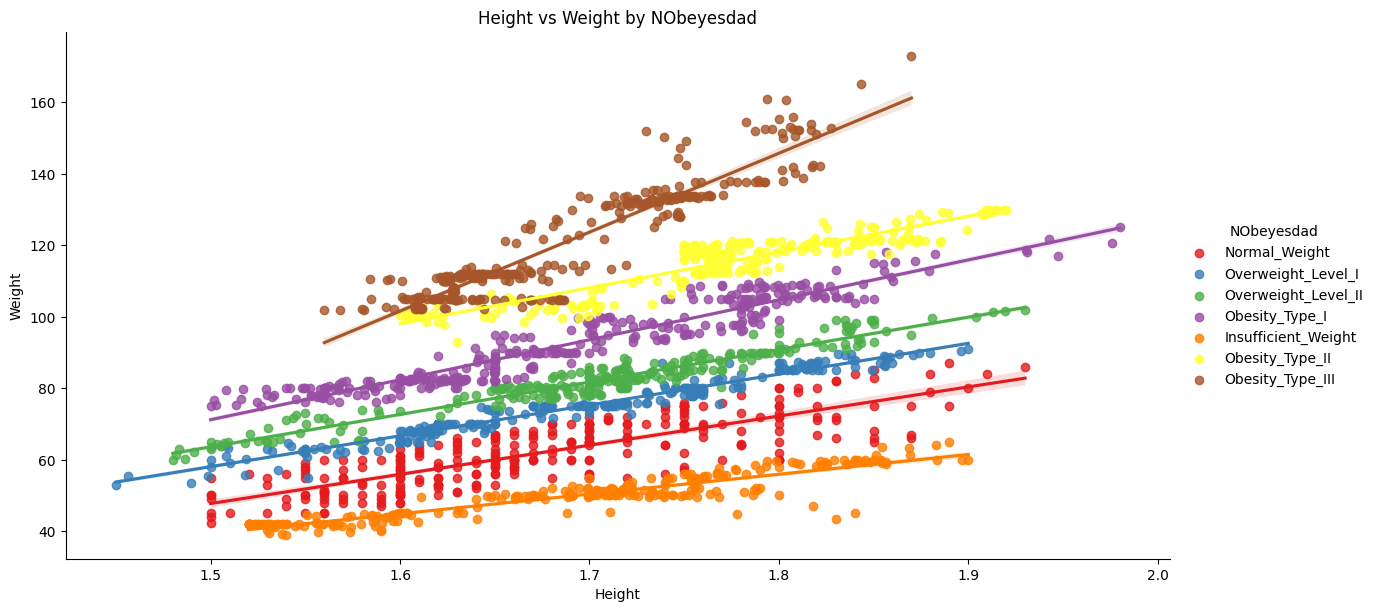

In [79]:
df = read_from_csv("data/dataset.csv")

sns.lmplot(
    data=df,
    x="Height",
    y="Weight",
    hue="NObeyesdad",
    palette="Set1",
    height=6,
    aspect=2
)

plt.title("Height vs Weight by NObeyesdad")
plt.show()

We can observe a relatively high correlation between height and weight (both in the plot of linear regression and in the correlation matrices) across weight classes. Since this can be purely coincidence (the taller you are, the higher your body mass), or whether height is a predictor of obesity we can analyze the distribution of height across weight classes.

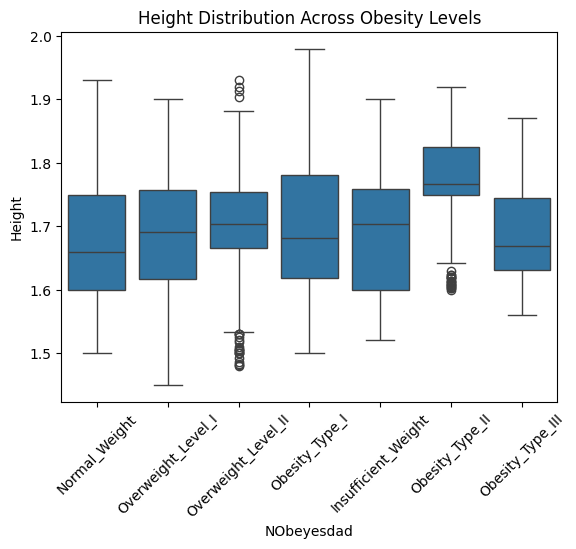

In [80]:
df = read_from_csv("data/dataset.csv")

sns.boxplot(x=df["NObeyesdad"], y=df["Height"])
plt.title("Height Distribution Across Obesity Levels")
plt.xticks(rotation=45)
plt.show()

We see that height is rather evenly distributed across all obesity classes, save for obesity type II, which is an outlier, which proves the height-weight correlation has little to do with obesity.

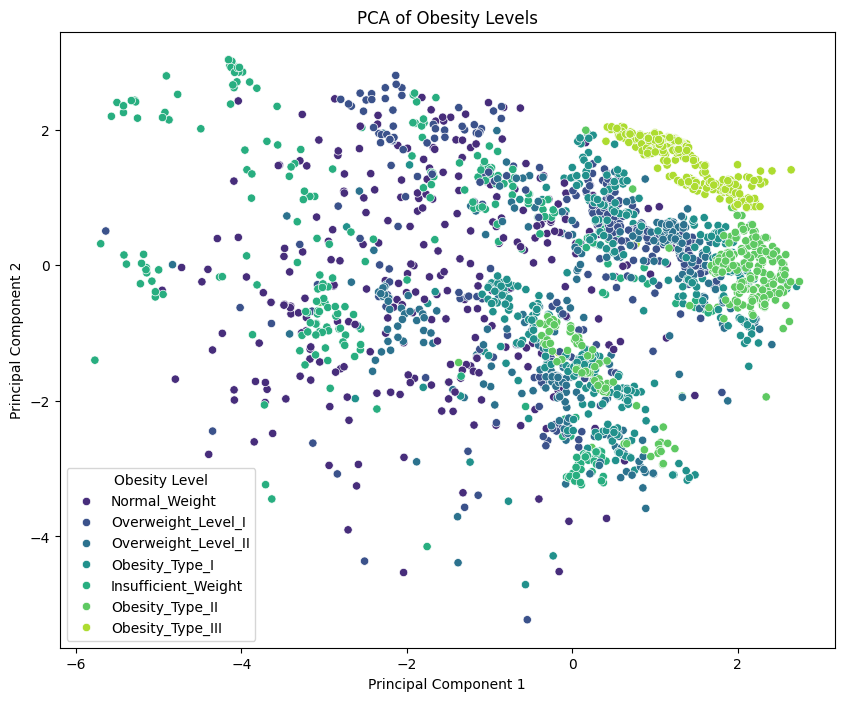

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

df = read_from_csv("data/dataset.csv")
df_copy = df.copy()

le = LabelEncoder()
for col in df_copy.select_dtypes(include=['object']).columns:
    df_copy[col] = le.fit_transform(df_copy[col])

df_copy = pd.get_dummies(df_copy, columns=["MTRANS", "CAEC", "CALC"], drop_first=True)

X_scaled = StandardScaler().fit_transform(df_copy.drop(columns=["NObeyesdad"]))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["NObeyesdad"] = df["NObeyesdad"]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="NObeyesdad", palette="viridis")
plt.title("PCA of Obesity Levels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Obesity Level")
plt.show()

Dimensionality reduction has led to a significant dispersion of classes, the only easily identifiable cluster is obesity type III. This suggests the data is poorly seperable linearly and non-linear methods should yield better results.

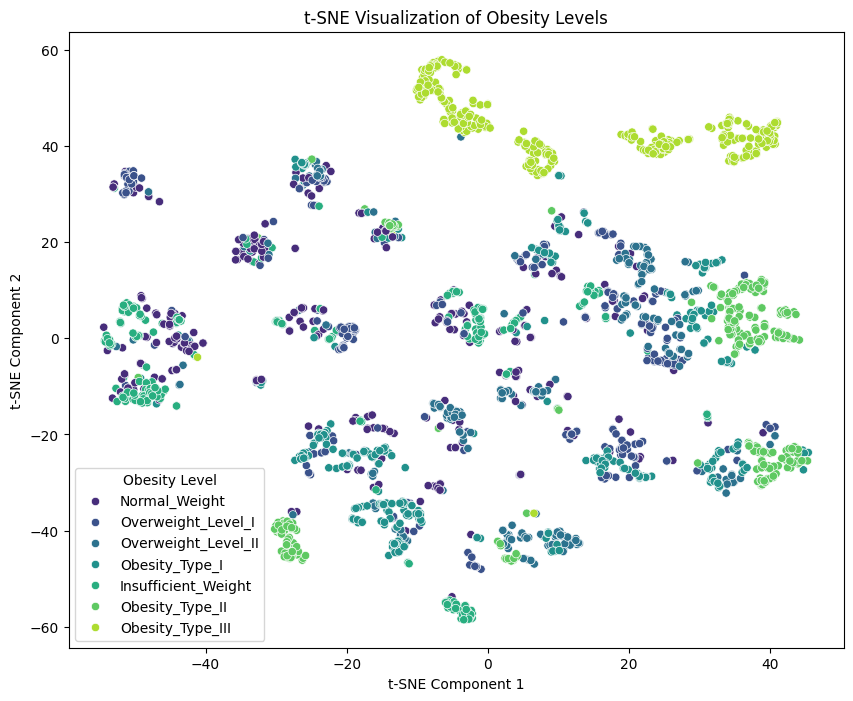

In [83]:
from sklearn.manifold import TSNE

df = read_from_csv('data/dataset.csv')
df_copy = df.copy()

le = LabelEncoder()
for col in df_copy.select_dtypes(include=['object']).columns:
    df_copy[col] = le.fit_transform(df_copy[col])

df_copy = pd.get_dummies(df_copy, columns=["MTRANS", "CAEC", "CALC"], drop_first=True)

features = df_copy.drop(columns=["NObeyesdad"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

y = df["NObeyesdad"]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_embedded, columns=["TSNE1", "TSNE2"])
tsne_df["NObeyesdad"] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="NObeyesdad", palette="viridis")
plt.title("t-SNE Visualization of Obesity Levels")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Obesity Level")
plt.show()

After t-SNE dimensionality reduction we see certain classes are well defined, such as obesity type II and III (which we also saw after PCA analysis). All other classes overlap significantly, which suggests that individuals in those categories share similar feature values, making them difficult to seperate. High obesity consistently proves to be the easies class to identify.